In [105]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
from plotnine import *

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
%precision %.7g 
%matplotlib inline

In [106]:
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW2.csv")

genderIdDummy = pd.get_dummies(df["gender_id"])
stateDummy = pd.get_dummies(df["state"])

df = pd.concat([df, genderIdDummy], axis = 1)
df = pd.concat([df, stateDummy], axis = 1)

df.columns

Index(['age', 'had_cancer', 'gender_id', 'income_in_k', 'state',
       'credit_score', 'num_credit_sources', 'utilization_rate', 'gave_loan',
       'Female', 'Male', 'Non-Binary',
       'Survey Choices Do Not Accurately Reflect My Identity', 'AK', 'AL',
       'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT',
       'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

Logistic Regression Average Test Accuracy: 0.7307499999999999
Logistic Regression Average Train Accuracy: 0.7358125000000001
Decision Tree Average Accuracy: 0.73175
Decision Tree Best Depths: [1, 2, 2, 1, 1]
KNN Model Average Accuracy: 0.73275
KNN Model Best Parameters: [30, 38, 28, 32, 26]


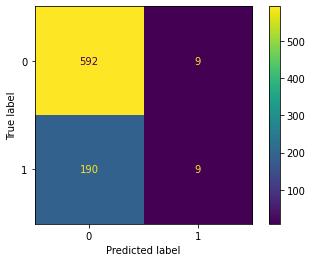

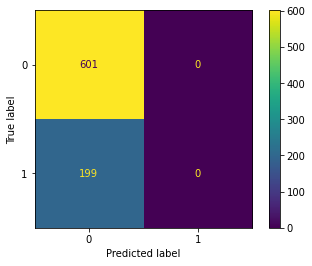

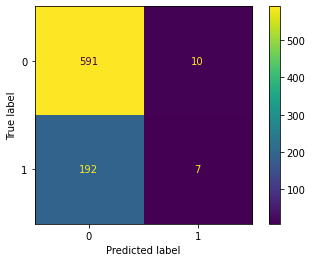

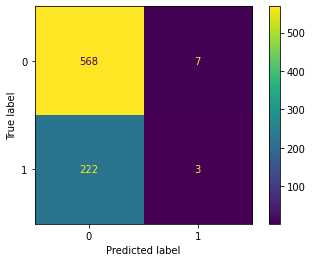

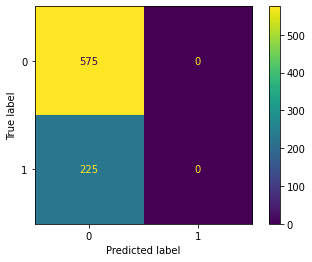

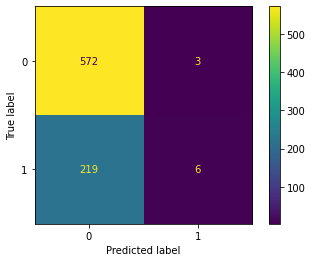

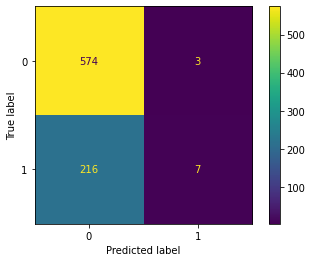

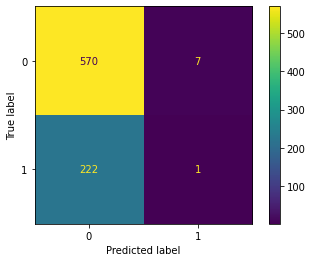

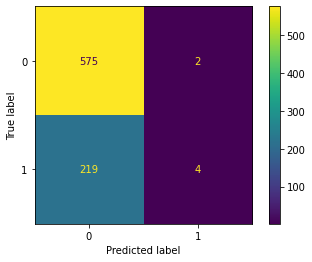

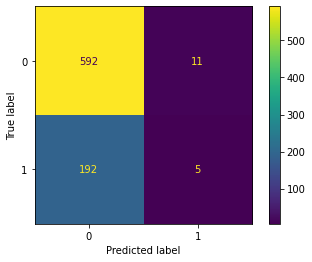

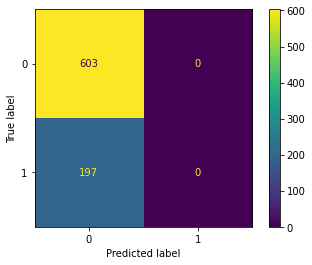

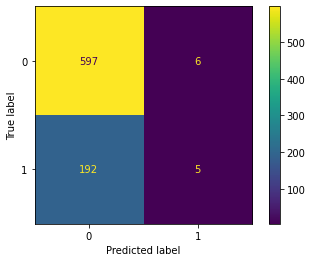

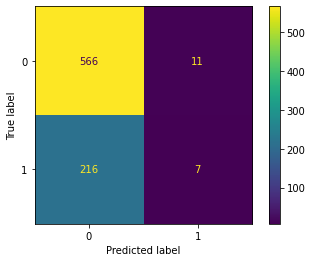

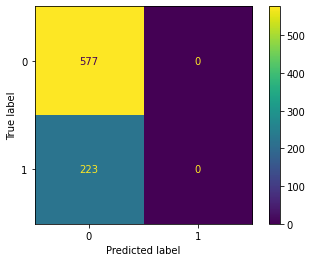

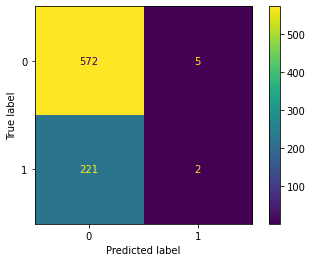

In [107]:
predictors = ["age", "had_cancer", "income_in_k", "credit_score", "num_credit_sources", "utilization_rate",
              "Female", "Male", "Non-Binary", "Survey Choices Do Not Accurately Reflect My Identity", 
              "AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "IA", "ID", "IL", "IN",
              "KS", "KY", "LA", "MA", "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE", "NH", "NJ",
              "NM", "NV", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI",
              "WV", "WY"]

contPredictors = ["age", "income_in_k", "credit_score", "num_credit_sources", "utilization_rate"]

X = df[predictors]
y = df["gave_loan"]
knnX = df[contPredictors]

acc_train = [] 
acc_test = []
acc_tree = []
knn_test = []
tree_depths = []
knn_BP = []

kf = KFold(n_splits = 5)

for train_indices, test_indices in kf.split(X):    
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    knnX_train = knnX.iloc[train_indices] 
    knnX_test = knnX.iloc[test_indices] 
        
    zScore = StandardScaler()
    
    X_train[contPredictors] = zScore.fit_transform(X_train[contPredictors])
    X_test[contPredictors] = zScore.transform(X_test[contPredictors]) 

    #Logistic Regression 
    lr = LogisticRegression()
    
    model = lr.fit(X_train, y_train)
    
    acc_test.append(accuracy_score(y_test, model.predict(X_test)))
    acc_train.append(accuracy_score(y_train, model.predict(X_train)))
    plot_confusion_matrix(model, X_test, y_test)

    #Decision Tree
    tree = DecisionTreeClassifier()
    
    zTree = make_column_transformer((StandardScaler(), contPredictors))
    pipelineTree = make_pipeline(zTree, tree)

    optimalK1 = {"decisiontreeclassifier__max_depth": range(1, 10)}
    
    treeGrid = GridSearchCV(pipelineTree, optimalK1, scoring = "accuracy")
    treeModel = treeGrid.fit(X_train, y_train)
    tree_depths.append(treeModel.best_estimator_.get_params()["decisiontreeclassifier__max_depth"])
    acc_tree.append(accuracy_score(y_test, treeModel.predict(X_test)))
    plot_confusion_matrix(treeModel, X_test, y_test)
    
    #KNN
    knn = KNeighborsClassifier()
    
    zKNN = make_column_transformer((StandardScaler(), contPredictors))
    pipelineKNN = make_pipeline(zKNN, knn)
    
    optimalK2 = {"kneighborsclassifier__n_neighbors": range(1, 40)}
    
    grid = GridSearchCV(pipelineKNN, optimalK2, scoring = "accuracy")
    knnModel = grid.fit(knnX_train, y_train)
    knn_BP.append(knnModel.best_estimator_.get_params()["kneighborsclassifier__n_neighbors"])
    knn_test.append(knnModel.score(knnX_test, y_test))
    plot_confusion_matrix(knnModel, knnX_test, y_test)
        
print("Logistic Regression Average Test Accuracy:", np.mean(acc_test))
print("Logistic Regression Average Train Accuracy:", np.mean(acc_train)) 
print("Decision Tree Average Accuracy:", np.mean(acc_tree)) 
print("Decision Tree Best Depths:", tree_depths)
print("KNN Model Average Accuracy:", np.mean(knn_test))
print("KNN Model Best Parameters:", knn_BP)

Answer to #2 here

**A**

Using my accuracy and the confusion matrices, it is still pretty difficult to see which model is far and away the BEST model. However, basing off of the average accuracies that I calculated above, we can say that the KNN Model performed the best. Consistently across all the confusion matrices, we can see that the models are excellent at correctly predicting when someone is not given a loan. All the models also have an average accuracy of greater than 0.73, with the KNN Model just barely having a higher average accuracy by a margin of 0.001. Upon conclusion, all the models did a pretty decent job, but the KNN Model did the best if I had to pick one. 

In [104]:
males = (df[df["Male"] == 1])
females = (df[df["Female"] == 1])
nonBinaries = (df[df["Non-Binary"] == 1])
noResponses = (df[df["Survey Choices Do Not Accurately Reflect My Identity"] == 1])

knnAccuracy1 = knnModel.score(males[contPredictors], males["gave_loan"])
knnAccuracy2 = knnModel.score(females[contPredictors], females["gave_loan"])
knnAccuracy3 = knnModel.score(nonBinaries[contPredictors], nonBinaries["gave_loan"])
knnAccuracy4 = knnModel.score(noResponses[contPredictors], noResponses["gave_loan"])

treeAccuracy1 = accuracy_score(males["gave_loan"], treeModel.predict(males[predictors]))
treeAccuracy2 = accuracy_score(females["gave_loan"], treeModel.predict(females[predictors]))
treeAccuracy3 = accuracy_score(nonBinaries["gave_loan"], treeModel.predict(nonBinaries[predictors]))
treeAccuracy4 = accuracy_score(noResponses["gave_loan"], treeModel.predict(noResponses[predictors]))

lrAccuracy1 = accuracy_score(males["gave_loan"], model.predict(males[predictors]))
lrAccuracy2 = accuracy_score(females["gave_loan"], model.predict(females[predictors]))
lrAccuracy3 = accuracy_score(nonBinaries["gave_loan"], model.predict(nonBinaries[predictors]))
lrAccuracy4 = accuracy_score(noResponses["gave_loan"], model.predict(noResponses[predictors]))

print("KNN Accuracy: Male:", knnAccuracy1, "Female:", knnAccuracy2, "Non-Binary:", knnAccuracy3, 
      "\nSurvey Choices Do Not Accurately Reflect My Identity:", knnAccuracy4)
print("\nDecision Tree Accuracy: Male:", treeAccuracy1, "Female:", treeAccuracy2, "Non-Binary:", treeAccuracy3, 
      "\nSurvey Choices Do Not Accurately Reflect My Identity:", treeAccuracy4)
print("\nLogistic Regression Accuracy: Male:", lrAccuracy1, "Female:", lrAccuracy2, "Non-Binary:", lrAccuracy3, 
      "\nSurvey Choices Do Not Accurately Reflect My Identity:", lrAccuracy4)


KNN Accuracy: Male: 0.7265917602996255 Female: 0.7439921530161844 Non-Binary: 0.7678571428571429 
Survey Choices Do Not Accurately Reflect My Identity: 0.7777777777777778

Decision Tree Accuracy: Male: 0.7228464419475655 Female: 0.7405590975968612 Non-Binary: 0.7678571428571429 
Survey Choices Do Not Accurately Reflect My Identity: 0.8055555555555556

Logistic Regression Accuracy: Male: 0.27715355805243447 Female: 0.2594409024031388 Non-Binary: 0.23214285714285715 
Survey Choices Do Not Accurately Reflect My Identity: 0.19444444444444445


**B)**

We can see that there are some differences in how the models did depending on the gender IDs. It is observable that the KNN and Decision Tree Models performed rather similarly for all the genders except for the "Survey Choices Do Not Accurately Reflect My Identity" category, in which the Decision Tree performed better. On the other hand, my Logistic Regression model performed very poorly for all the genders. The highest accruacy score that was recorded for the Logistic Regression was 0.278, in comparison to 0.723 for the other two models. Therefore, we can say that the Logistic Regression performed much poorer for all the genders compared to the Decision Tree and KNN Model.

**C)**

The model is definitely much better at predicting people who did not get loans. We can tell this based off of all the confusion matrices. Regardless of the model, we can see that for almost every confusion matrix, the vast majority of the predicted labels are in the 0 column. There are certain matrices, like those in the Logistic Regression and KNN Model, that have no predictions in the 1 column, meaning no predictions were made that people got loans. Out of the 800 values that the models are evaluating, and for 0 of them to predict people getting loans, is a pretty good indicator that the model is better at predicting people who did not get loans.